In [1]:
import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/raw/train.csv')
df

,Company_ID,Product_ID,Target,Date,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,...,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16,num_17,num_18
0,3,10395,1,2021-09-12,1,3689,2,2,0.0,1,...,NaN,NaN,1.0,1.0,136.800,136.800000,136.80,152.95,136.80,136.80
1,3,11303,10,2023-02-12,3,1736,2,2,2.0,3,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2499,2,2020-05-24,1,3572,1,2,0.0,4,...,NaN,2.493151,3.0,2.0,411.939,677.394667,830.28,908.60,830.28,830.28
3,3,3118,10,2019-07-12,3,1435,2,2,0.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,13044,6,2019-02-29,1,1263,0,2,0.0,3,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5310945,2,13577,4,2020-03-13,1,7875,1,2,0.0,2,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5310946,2,1105,1,2022-01-05,1,6299,1,2,0.0,2,...,0.0,NaN,3.0,2.0,77.148,111.096000,151.74,104.28,104.40,104.40
5310947,3,3896,1,2020-09-17,1,3817,2,2,2.0,2,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5310948,1,3097,1,2023-11-01,1,7873,0,2,2.0,3,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df.columns

Index(['Company_ID', 'Product_ID', 'Target', 'Date', 'cat_0', 'cat_1', 'cat_2',
       'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7', 'cat_8', 'cat_9', 'cat_10',
       'cat_11', 'cat_12', 'cat_13', 'cat_14', 'num_0', 'num_1', 'num_2',
       'num_3', 'num_4', 'num_5', 'num_6', 'num_7', 'num_8', 'num_9', 'num_10',
       'num_11', 'num_12', 'num_13', 'num_14', 'num_15', 'num_16', 'num_17',
       'num_18'],
      dtype='object')

In [3]:
test_df = pd.read_csv('data/raw/sample_submission.csv')
test_df

,Id,Target
0,0_1_2024-01,0
1,0_2_2024-01,0
2,0_3_2024-01,0
3,0_5_2024-01,0
4,0_6_2024-01,0
...,...,...
113851,3_14664_2024-03,0
113852,3_14665_2024-03,0
113853,3_14666_2024-03,0
113854,3_14667_2024-03,0


In [4]:
test_df['Company_ID'] = test_df['Id'].apply(lambda x: x[:x.find('_')]).astype(int)
test_df['Product_ID'] = test_df['Id'].apply(lambda x: x[x.find('_') + 1:x.rfind('_')]).astype(int)
test_df['Date'] = pd.to_datetime(test_df['Id'].apply(lambda x: x[x.rfind('_') + 1:]))
test_df = test_df.drop(columns=['Id'], axis=1)
test_df

,Target,Company_ID,Product_ID,Date
0,0,0,1,2024-01-01
1,0,0,2,2024-01-01
2,0,0,3,2024-01-01
3,0,0,5,2024-01-01
4,0,0,6,2024-01-01
...,...,...,...,...
113851,0,3,14664,2024-03-01
113852,0,3,14665,2024-03-01
113853,0,3,14666,2024-03-01
113854,0,3,14667,2024-03-01


In [33]:
df['Target'].describe()

count    5.310950e+06
mean     7.451920e+00
std      4.326484e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      4.000000e+00
max      6.560000e+03
Name: Target, dtype: float64

In [34]:
(df['Target'] % 1 != 0).sum()

0

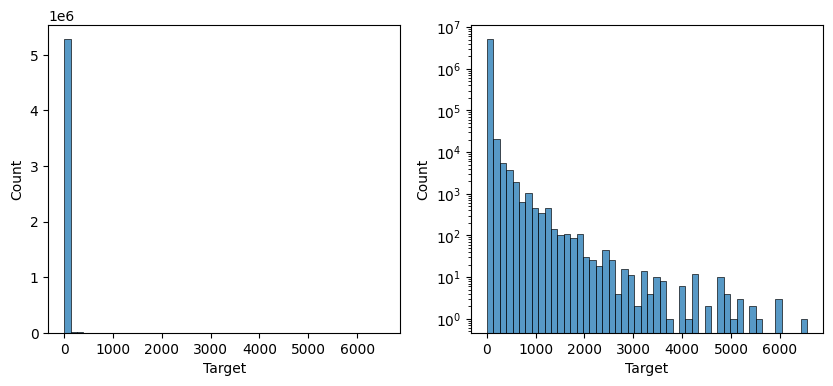

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=100)

sns.histplot(df['Target'], bins=50, ax=ax[0])

sns.histplot(df['Target'], bins=50, ax=ax[1])
ax[1].set_yscale('log')

In [37]:
df['Date'].min(), df['Date'].max()

('2019-01-02', '2023-12-30')

<Axes: xlabel='Company_ID', ylabel='Count'>

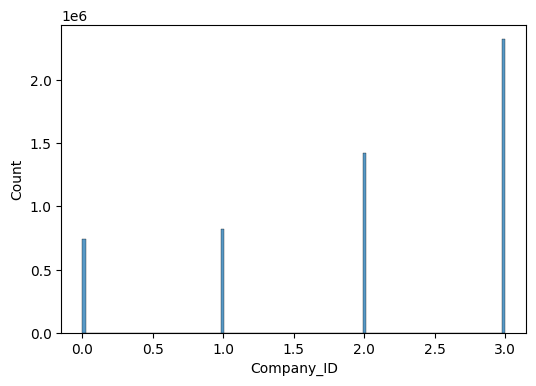

In [42]:
fig = plt.figure(figsize=(6, 4), dpi=100)
sns.histplot(df['Company_ID'])

In [46]:
df['Product_ID'].value_counts()

Product_ID
1172     30778
14188    22454
8588     20112
7929     19781
3190     14774
         ...  
8308         1
3319         1
13119        1
10403        1
7329         1
Name: count, Length: 14413, dtype: int64